In [1]:
import pickle
import networkx as nx

g = nx.read_gpickle("ego-twitter.p")

In [19]:
node = list(g.nodes())[:50]
s = g.subgraph(node)

In [20]:
s = g.subgraph(node)

In [7]:
s.neighbors()

<generator object FilterAtlas.__iter__.<locals>.<genexpr> at 0x7fb71f43ef48>

In [8]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.degree_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

In [12]:
# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(s)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(s)[node] == max(nx.betweenness_centrality(s).values())

{1}


In [ ]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [ ]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35

In [ ]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

/home/shudipto/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/shudipto/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


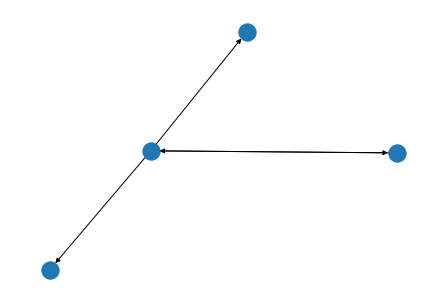

In [14]:
import matplotlib.pyplot as plt

nodes_of_interest = [29, 38, 42]  # provided.

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(s, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

In [26]:
node = list(g.nodes())[:30]
s = g.subgraph(node)

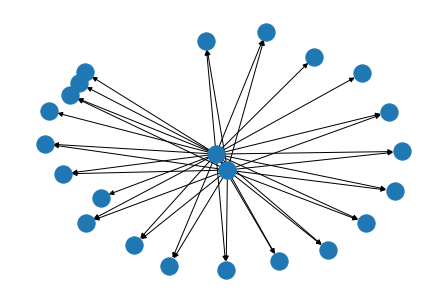

In [27]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in s.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = s.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = s.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()